**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Kavin Raj
- Arnav Saxena
- Tiantong Wu
- Peike Xu
- Jing Yin Yip

# Research Question

How do opinionated tweets on Twitter as measured by a sentiment analysis model affect the stock price of Tesla within the time period of September 2021 to September 2022?

## Background and Prior Work

Twitter is a widely used social media platform for expressing many kinds of opinions, including those on certain companies. We believe that this may have an impact on the public perception of these companies, and we aim to investigate whether there is a connection between opinions expressed in social media and the actual stock prices of the companies in question. An example of was seen this back in 2021, when “a thread on r/WallStreetBets”  caused “more than 7,200% increase in GME—and a 689% run”<a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> . This occurence informed us that there is a potential causal effect between opinions on social media and real-world stock prices; we think that this effect has a much greater scope than just this isolated case of GameStop stocks, and we are interested in seeing if this is a larger, more general phenomenon that can be applied to other time periods and companies.

When reading a research paper from the IOP conference series, we found a sentiment analysis model based on social media opinion on stock trading. It was remarked in the conclusion that “looking into correlation coefficient compared by number of days before and after the trading day, the result shows that correlation reaches to the peak on trading day then it gradually declines with the magnitude depending on the day length after trading day.” <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup> This research is similar to what we aim to investigate, as the paper conducted their test on a Thai social media platform called Pantip, and discussed ten Thai companies. The paper provides more evidence that there is a causal link between social media sentiment and stock prices, and we are interested to see if a similar trend can be seen with tweets and tech companies' stocks in the US. Additionally, we would also like to investigate if there are other similarities or differences in the trends that we are able to identify between our research and the paper, such as the correlation between variables reaching a peak on trading day.

1. <a name="cite_note-1"></a> <sup>[<a href="#cite_ref-1">1</a>]</sup> Rechel, J. (28 Jan 2021) How social media moves markets: Analyzing GameStop (GME) using social listening data. Sprout Blog.
   <br> https://sproutsocial.com/insights/gamestop-stock-social-media

2. <a name="cite_note-2"></a> <sup>[<a href="#cite_ref-2">2</a>]</sup>  P Padhanarath et al 2019 IOP Conf. Ser.: Mater. Sci. Eng. 620 012094.
   <br>https://iopscience.iop.org/article/10.1088/1757-899X/620/1/012094/pdf


# Hypothesis


Before answering our research question by investigating the available data, we think that there will be a positive correlation between a positive sentiment for a company and said company’s stock prices rising, as well as a positive correlation between a negative sentiment for a company and said company’s stock prices falling. This is due to the connection between a company’s public perception, how that is reflected in social media, and how it manifests in the stock market. If tweets about a company are mostly negative within a certain time period, we would expect to observe a decrease in stock prices, as both phenomena correspond to a decrease in public perception of the company. However, we also acknowledge that this relationship may not be as straightforward as is stated here, as there may be other confounds affecting each variable, such as Twitter only capturing the sentiment of a more vocal sample of people as compared to the rest of the population.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Tweet Stock
  - Link to the dataset: https://www.kaggle.com/code/shreytandel19/stock-prediction-based-on-tweet-sentiment-analysis/input
  - Number of observations: 80793
  - Number of variables: 4
- Dataset #2
  - Dataset Name: TESLA_HISTORICAL
  - Link to the dataset: https://www.nasdaq.com/market-activity/stocks/tsla/historical
  - Number of observations: 1258
  - Number of variables: 6

The first dataset, Tweet Stock, is a collection of tweets that talk about TSLA, the stock for the company Tesla. The time range for this datasets is from September 30th, 2021 to September 29th, 2022, and was chosen  since we are unable to obtain current Twitter data, and need to rely on past data that has already been collected. The two important variables in this dataset are the dates that the tweets were posted, as well as the tweets themselves. The tweets are in the form of strings, and the dates will be converted into a standard Timestamp format. The tweets in this dataset will be used as a proxy for social media opinion, once it is processed by a sentiment analysis model.

The second dataset, TESLA_HISTORICAL, is a record of prices of the TSLA stock on each day from September 30th, 2021 to September 29th, 2022. This time range was chosen to match the time range of the other dataset. In the dataset, the highest, lowest, and open/close prices of the stock are recorded as floats in each row, along with the corresponding day, which will be converted into a standard Timestamp format. These variables can provide insight into how a stock varies within a day, and comparing these across different days can lead to potential trends over time. The prices are a direct factual record of TSLA prices, although further numerical processing may be needed later to reveal meaningful trends.

Further details of the specific steps taken to clean the datasets will be explained below.

## Set up

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize
import re


nltk.download('opinion_lexicon')
nltk.download('punkt') 
nltk.download('stopwords')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

[nltk_data] Downloading package opinion_lexicon to C:\Users\Kavin
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Kavin
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Kavin
[nltk_data]     Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Build Tweet Dataframes

We read the csv file, convert it to a dataframe, and drop any rows that contain empty values. Then, dates in the "Date" variable are converted  into standard Timestamp format. Afterwards, we narrow down the tweets to anything that includes "TSLA", and convert all the tweets into lower case, which is needed later for sentiment analysis.

In [3]:
tweet = pd.read_csv('data/stock_tweets.csv')
tweet.dropna(inplace=True)
#delete any missing value within the dataset
tweet['Date'] = pd.to_datetime(tweet.get('Date')).dt.date
#convert the date enteries into standarized form
tweet_tesla = tweet[tweet.get('Stock Name')=='TSLA']
#reduced the dataset into Tesla only
tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()
tweet_tesla = tweet_tesla.drop("Company Name", axis=1) 

# Read from other dataset, containing tweets for more companies.
tweets_multiple = pd.read_csv('data/Tweet.csv')
id_to_company = pd.read_csv('data/Company_Tweet.csv')
tweets_multiple = tweets_multiple.join(id_to_company.set_index('tweet_id'), on='tweet_id')
#delete any missing value within the dataset
tweets_multiple.dropna(inplace=True)

tweets_multiple = tweets_multiple[['post_date', 'body', 'ticker_symbol']]
#drop irrelvant columns

tweets_multiple['Date'] = pd.to_datetime(tweets_multiple['post_date'], unit='s').dt.date

tweets_multiple = tweets_multiple[['Date', 'body', 'ticker_symbol']]
tweets_multiple.columns = ['Date', 'Tweet', 'Stock Name']
tweets_multiple = tweets_multiple.sort_values(by=['Stock Name', 'Date'])

tweets_multiple = tweets_multiple.reset_index(drop=True)
tweets_multiple["isStatusChanged"] = tweets_multiple["Stock Name"].shift(1, fill_value=tweets_multiple["Stock Name"].head(1)) != tweets_multiple["Stock Name"]

tweets_multiple.loc[tweets_multiple["isStatusChanged"] == True]

apple_tweets = tweets_multiple.iloc[:1414802].drop(columns=['isStatusChanged']).reset_index(drop=True)
amazon_tweets = tweets_multiple.iloc[1414802:2123994].drop(columns=['isStatusChanged']).reset_index(drop=True)
google_tweets = tweets_multiple.iloc[2123994:2833526].drop(columns=['isStatusChanged']).reset_index(drop=True)
microsoft_tweets = tweets_multiple.iloc[2833526:3207324].drop(columns=['isStatusChanged']).reset_index(drop=True)
tesla_tweets = tweets_multiple.iloc[3207324:].drop(columns=['isStatusChanged']).reset_index(drop=True)
amazon_tweets

C:\Users\Kavin Raj\AppData\Local\Temp\ipykernel_12052\3069588816.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()


,Date,Tweet,Stock Name
0,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN
1,2015-01-01,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,AMZN
2,2015-01-01,RT @SeekingAlpha: A Look At BlackBerry's Deals...,AMZN
3,2015-01-01,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN
4,2015-01-01,Jeff Bezos lost $7.4 billion in #Amazon worst ...,AMZN
...,...,...,...
709187,2019-12-31,$AMZN Amazon Stock Broke Out -- and Hesitated;...,AMZN
709188,2019-12-31,"[Yahoo Finance Video - December 31, 2019] $AMZ...",AMZN
709189,2019-12-31,@Ryzenn $AAPL has to have a lights out ER to k...,AMZN
709190,2019-12-31,Is there a public database or website where I ...,AMZN


In [4]:
apple_tweets

,Date,Tweet,Stock Name
0,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL
1,2015-01-01,Insanity of today weirdo massive selling. $aap...,AAPL
2,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
3,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
4,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL
...,...,...,...
1414797,2019-12-31,Imagine calling your broker-dealer and wanting...,AAPL
1414798,2019-12-31,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",AAPL
1414799,2019-12-31,That $SPY $SPX puuump in the last hour was the...,AAPL
1414800,2019-12-31,I don't discriminate. I own both $aapl and $ms...,AAPL


In [5]:
microsoft_tweets

,Date,Tweet,Stock Name
0,2015-01-01,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,MSFT
1,2015-01-01,"http://StockAviator.com....Top penny stocks, N...",MSFT
2,2015-01-01,Want alerts for momentum stocks about to run? ...,MSFT
3,2015-01-01,"IMHO, $MSFT shockingly remains MILDLY undervalued",MSFT
4,2015-01-01,@CNNMoney I like $MSFT with him in charge. He ...,MSFT
...,...,...,...
373793,2019-12-31,Notable activity on social media recently for$...,MSFT
373794,2019-12-31,"$AAPL $MSFT $JPM - Apple, Microsoft top Dow 20...",MSFT
373795,2019-12-31,If this continues then the market will be enti...,MSFT
373796,2019-12-31,"Btw, Estimated #Earnings Per Share for $MSFT i...",MSFT


In [6]:
google_tweets

,Date,Tweet,Stock Name
0,2015-01-01,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,GOOG
1,2015-01-01,#GOOGLE 'C' : Chinese paper blames Google over...,GOOG
2,2015-01-01,"""http://iphone.appleinsider.com/articles/14/12...",GOOG
3,2015-01-01,Prediction: $TWTR $GRPN $YELP are acquired as ...,GOOG
4,2015-01-01,"$goog is roughly fairly valued, not a buy or s...",GOOG
...,...,...,...
709527,2019-12-31,$GOOGL also flat today,GOOGL
709528,2019-12-31,If this continues then the market will be enti...,GOOGL
709529,2019-12-31,Great day and years end over at #TRICKTRADES m...,GOOGL
709530,2019-12-31,#FastMoneyEspressoFINAL TRADES:Steve Grasso —>...,GOOGL


In [7]:
tesla_tweets = pd.concat([tesla_tweets, tweet_tesla], ignore_index=True).sort_values(by="Date")
tesla_tweets

,Date,Tweet,Stock Name
0,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,TSLA
72,2015-01-01,@SamAntar$TSLA does a lot of things to manipul...,TSLA
71,2015-01-01,Memo to @elonmusk: Those aren't chestnuts roas...,TSLA
70,2015-01-01,@WallStCynic @DumbLuckCapital @elonmusk Accoun...,TSLA
69,2015-01-01,@DumbLuckCapital do you put $splk $wday $panw ...,TSLA
...,...,...,...
1073281,2022-09-29,"so, tomorrow we have ai day and then this week...",TSLA
1073282,2022-09-29,two big things happening on september 30! \r\n...,TSLA
1073283,2022-09-29,this has the potential to become worse than vw...,TSLA
1073256,2022-09-29,"how are those model s ""boats"" doing, mr. fraud...",TSLA


In [8]:
sentiment = SentimentIntensityAnalyzer()

# # #tokenize the tweet and remove stopwords for furthur sentiment analysis
# print(tweet_tesla.loc[0]['Tweet'])
# tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(lambda tt: re.sub(r"(@[A-Za-z0-9]+)", "", tt))
# tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(word_tokenize)
# stop_words = set(stopwords.words('english'))
# tweet_tesla['Tweet'].apply(lambda x: [item for item in x if item not in stop_words])
# tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(keep_alphanumeric)

datasets = [apple_tweets, amazon_tweets, google_tweets, microsoft_tweets, tesla_tweets]

for df in datasets:
    #sentiment analysis
    df['sentimental score'] = df['Tweet'].apply(sentiment.polarity_scores)

    compound_score = []
    for score in df['sentimental score']:
        compound_score.append(score['compound'])
    compound_score

    df['sentimental score'] = compound_score

apple_tweets = datasets[0]
amazon_tweets = datasets[1]
google_tweets = datasets[2]
microsoft_tweets = datasets[3]
tesla_tweets = datasets[4]

In [9]:
tesla_tweets

,Date,Tweet,Stock Name,sentimental score
0,2015-01-01,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,TSLA,0.0000
72,2015-01-01,@SamAntar$TSLA does a lot of things to manipul...,TSLA,-0.4767
71,2015-01-01,Memo to @elonmusk: Those aren't chestnuts roas...,TSLA,-0.3400
70,2015-01-01,@WallStCynic @DumbLuckCapital @elonmusk Accoun...,TSLA,0.5423
69,2015-01-01,@DumbLuckCapital do you put $splk $wday $panw ...,TSLA,0.4404
...,...,...,...,...
1073281,2022-09-29,"so, tomorrow we have ai day and then this week...",TSLA,-0.2037
1073282,2022-09-29,two big things happening on september 30! \r\n...,TSLA,0.0000
1073283,2022-09-29,this has the potential to become worse than vw...,TSLA,-0.4767
1073256,2022-09-29,"how are those model s ""boats"" doing, mr. fraud...",TSLA,0.0000


In [10]:
apple_tweets

,Date,Tweet,Stock Name,sentimental score
0,2015-01-01,"lx21 made $10,008 on $AAPL -Check it out! htt...",AAPL,0.0000
1,2015-01-01,Insanity of today weirdo massive selling. $aap...,AAPL,-0.8271
2,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,0.0000
3,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,0.0000
4,2015-01-01,Swing Trading: Up To 8.91% Return In 14 Days h...,AAPL,0.0000
...,...,...,...,...
1414797,2019-12-31,Imagine calling your broker-dealer and wanting...,AAPL,0.4939
1414798,2019-12-31,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",AAPL,0.7574
1414799,2019-12-31,That $SPY $SPX puuump in the last hour was the...,AAPL,-0.3382
1414800,2019-12-31,I don't discriminate. I own both $aapl and $ms...,AAPL,0.0000


In [11]:
microsoft_tweets

,Date,Tweet,Stock Name,sentimental score
0,2015-01-01,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,MSFT,0.2023
1,2015-01-01,"http://StockAviator.com....Top penny stocks, N...",MSFT,0.0000
2,2015-01-01,Want alerts for momentum stocks about to run? ...,MSFT,0.0772
3,2015-01-01,"IMHO, $MSFT shockingly remains MILDLY undervalued",MSFT,-0.1779
4,2015-01-01,@CNNMoney I like $MSFT with him in charge. He ...,MSFT,0.7184
...,...,...,...,...
373793,2019-12-31,Notable activity on social media recently for$...,MSFT,0.0000
373794,2019-12-31,"$AAPL $MSFT $JPM - Apple, Microsoft top Dow 20...",MSFT,0.2023
373795,2019-12-31,If this continues then the market will be enti...,MSFT,-0.4767
373796,2019-12-31,"Btw, Estimated #Earnings Per Share for $MSFT i...",MSFT,0.2960


In [12]:
amazon_tweets

,Date,Tweet,Stock Name,sentimental score
0,2015-01-01,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,AMZN,-0.4278
1,2015-01-01,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,AMZN,0.2023
2,2015-01-01,RT @SeekingAlpha: A Look At BlackBerry's Deals...,AMZN,0.0000
3,2015-01-01,Jeff Bezos lost $7.4 billion in Amazon's worst...,AMZN,-0.7506
4,2015-01-01,Jeff Bezos lost $7.4 billion in #Amazon worst ...,AMZN,-0.6908
...,...,...,...,...
709187,2019-12-31,$AMZN Amazon Stock Broke Out -- and Hesitated;...,AMZN,-0.5267
709188,2019-12-31,"[Yahoo Finance Video - December 31, 2019] $AMZ...",AMZN,0.3612
709189,2019-12-31,@Ryzenn $AAPL has to have a lights out ER to k...,AMZN,0.3612
709190,2019-12-31,Is there a public database or website where I ...,AMZN,0.6908


In [13]:
google_tweets

,Date,Tweet,Stock Name,sentimental score
0,2015-01-01,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,GOOG,0.2023
1,2015-01-01,#GOOGLE 'C' : Chinese paper blames Google over...,GOOG,-0.6486
2,2015-01-01,"""http://iphone.appleinsider.com/articles/14/12...",GOOG,0.6249
3,2015-01-01,Prediction: $TWTR $GRPN $YELP are acquired as ...,GOOG,0.5423
4,2015-01-01,"$goog is roughly fairly valued, not a buy or s...",GOOG,0.4404
...,...,...,...,...
709527,2019-12-31,$GOOGL also flat today,GOOGL,0.0000
709528,2019-12-31,If this continues then the market will be enti...,GOOGL,-0.4767
709529,2019-12-31,Great day and years end over at #TRICKTRADES m...,GOOGL,0.8481
709530,2019-12-31,#FastMoneyEspressoFINAL TRADES:Steve Grasso —>...,GOOGL,0.0000


In [14]:
# # tweets_multiple = pd.read_csv('Tweet.csv')
# # id_to_company = pd.read_csv('Company_Tweet.csv')
# tweets_multiple = tweets_multiple.join(id_to_company.set_index('tweet_id'), on='tweet_id')
# tweets_multiple.dropna(inplace=True)
# #delete any missing value within the dataset


# # tweet['Date'] = pd.to_datetime(tweet.get('Date')).dt.date
# # #convert the date enteries into standarized form
# # tweet_tesla = tweet[tweet.get('Stock Name')=='TSLA']
# # #reduced the dataset into Tesla only
# # tweet_tesla['Tweet'] = tweet_tesla['Tweet'].str.lower()
# # #convert all the tweet into lower case for easier analysis
# # # %pip install nltk
# # # import nltk
# # # from nltk.corpus import stopwords
# # # from nltk.tokenize import word_tokenize
# # print(tweet_tesla.loc[0]['Tweet'])
# # tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(lambda tt: re.sub(r"(@[A-Za-z0-9_]+)", "", tt))
# # tweet_tesla['Tweet'] = tweet_tesla['Tweet'].apply(word_tokenize)
# # stop_words = set(stopwords.words('english'))

# # tweet_tesla['Tweet'].apply(lambda x: [item for item in x if item not in stop_words])
# # # #tokenize the tweet and remove stopwords for furthur sentiment analysis

# tweets_multiple = tweets_multiple[['post_date', 'body', 'ticker_symbol']]
# #drop irrelvant columns

# tweets_multiple['Date'] = pd.to_datetime(tweets_multiple['post_date'], unit='s').dt.date

# tweets_multiple = tweets_multiple[['Date', 'body', 'ticker_symbol']]
# tweets_multiple.columns = ['Date', 'Tweet', 'Stock Name']
# tweets_multiple = tweets_multiple.sort_values(by=['Stock Name', 'Date'])

# tweets_multiple = tweets_multiple.reset_index(drop=True)
# tweets_multiple["isStatusChanged"] = tweets_multiple["Stock Name"].shift(1, fill_value=tweets_multiple["Stock Name"].head(1)) != tweets_multiple["Stock Name"]

# tweets_multiple.loc[tweets_multiple["isStatusChanged"] == True]

# apple_tweets = tweets_multiple.iloc[:1414802].drop(columns=['isStatusChanged']).reset_index(drop=True)
# amazon_tweets = tweets_multiple.iloc[1414802:2123994].drop(columns=['isStatusChanged']).reset_index(drop=True)
# google_tweets = tweets_multiple.iloc[2123994:2833526].drop(columns=['isStatusChanged']).reset_index(drop=True)
# microsoft_tweets = tweets_multiple.iloc[2833526:3207324].drop(columns=['isStatusChanged']).reset_index(drop=True)
# tesla_tweets = tweets_multiple.iloc[3207324:].drop(columns=['isStatusChanged']).reset_index(drop=True)

In [15]:
# microsoft_tweets

In [16]:
# # Load positive and negative words from the opinion lexicon
# # sentiment analysis
# positive_words = set(opinion_lexicon.positive())
# negative_words = set(opinion_lexicon.negative())

# def analyze_sentiment(words):
#     c = 0
#     for word in words:
#         if word in positive_words:
#             c +=1
#         elif word in negative_words:
#             c -=1
#         else:
#             c += 0
#     if(c>1):
#         return 1
#     elif c == 0:
#         return 0
#     else:
#         return -1
# tweet_tesla['sentimental score'] = tweet_tesla['Tweet'].apply(analyze_sentiment)
# tweet_tesla

## Stock Data

We first read the csv file for Tesla and convert it into a dataframe. Following that, any rows that contain empty values are dropped. We then convert the date to standard Timestamp format, to make it easier to manipulate the certain dates we are looking for. For the price variables, dollar signs in the entries are removed, and the numerical values are converted to floats. Lastly, the appropriate time range is selected to match our dataset of Tweets.

In [17]:
tesla = pd.read_csv('data/TESLA_HISTORICAL.csv')
apple = pd.read_csv('data/APPLE_HISTORICAL.csv')
amazon = pd.read_csv('data/AMAZON_HISTORICAL.csv')
microsoft = pd.read_csv('data/MICROSOFT_HISTORICAL.csv')
googl = pd.read_csv('data/GOOGL_HISTORICAL.csv')
goog = pd.read_csv('data/GOOG_HISTORICAL.csv')

stocks = [tesla, apple, amazon, microsoft, goog, googl]

for df in stocks:
    df.dropna(inplace=True)
    #delete any missing value within the dataset
    df['Date'] = pd.to_datetime(df.get('Date')).dt.date
    #convert the date enteries into standarized form
    def nodollartofloat(series):
        series = series.str.strip('$')
        blank = []
        for i in series:
            i = float(i)
            blank = np.append(blank,i)
        return blank
    df['End Day Price'] = nodollartofloat(df['Close/Last'])
    df['Beginning Day Price'] = nodollartofloat(df['Open'])
    df['Highest Price'] = nodollartofloat(df['High'])
    df['Lowest Price'] = nodollartofloat(df['Low'])
    df = df.drop(['Close/Last','Volume','Open','High','Low'], axis=1)
    #convert all string input into number

    start_date = pd.to_datetime('2015-01-01').date()
    end_date = pd.to_datetime('2022-09-29').date()

    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    df.reset_index(drop=True, inplace=True)

tesla =  stocks[0]
apple = stocks[1]
amazon = stocks[2]
microsoft= stocks[3]
goog = stocks[4]
googl = stocks[5]

In [18]:
tesla

,Date,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2023-11-27,$236.08,112031800,$236.89,$238.33,$232.10,236.0800,236.8900,238.3300,232.1000
1,2023-11-24,$235.45,65125200,$233.75,$238.75,$232.33,235.4500,233.7500,238.7500,232.3300
2,2023-11-22,$234.21,118117100,$242.04,$244.01,$231.40,234.2100,242.0400,244.0100,231.4000
3,2023-11-21,$241.20,122288000,$235.04,$243.62,$233.34,241.2000,235.0400,243.6200,233.3400
4,2023-11-20,$235.60,116562400,$234.04,$237.10,$231.02,235.6000,234.0400,237.1000,231.0200
...,...,...,...,...,...,...,...,...,...,...
2510,2013-12-05,$9.3653,139166855,$9.3433,$9.5567,$9.30,9.3653,9.3433,9.5567,9.3000
2511,2013-12-04,$9.2633,196824202,$9.6213,$9.6287,$9.142,9.2633,9.6213,9.6287,9.1420
2512,2013-12-03,$9.6467,384302358,$8.8453,$9.6627,$8.7727,9.6467,8.8453,9.6627,8.7727
2513,2013-12-02,$8.278,114636993,$8.4233,$8.57,$8.2621,8.2780,8.4233,8.5700,8.2621


In [19]:
apple

,Date,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2023-11-27,$189.79,40552610,$189.92,$190.67,$188.90,189.7900,189.9200,190.6700,188.9000
1,2023-11-24,$189.97,24048340,$190.87,$190.90,$189.25,189.9700,190.8700,190.9000,189.2500
2,2023-11-22,$191.31,39630010,$191.49,$192.93,$190.825,191.3100,191.4900,192.9300,190.8250
3,2023-11-21,$190.64,38134490,$191.41,$191.52,$189.74,190.6400,191.4100,191.5200,189.7400
4,2023-11-20,$191.45,46538610,$189.89,$191.905,$189.88,191.4500,189.8900,191.9050,189.8800
...,...,...,...,...,...,...,...,...,...,...
2510,2013-12-05,$20.2822,446402981,$20.4518,$20.5406,$20.2289,20.2822,20.4518,20.5406,20.2289
2511,2013-12-04,$20.1786,377116729,$20.1964,$20.3282,$20.0293,20.1786,20.1964,20.3282,20.0293
2512,2013-12-03,$20.2258,449352780,$19.9393,$20.2279,$19.9172,20.2258,19.9393,20.2279,19.9172
2513,2013-12-02,$19.6868,471672691,$19.9286,$20.1546,$19.6722,19.6868,19.9286,20.1546,19.6722


In [20]:
amazon

,Date,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2023-11-27,$147.73,53762430,$147.53,$149.26,$146.88,147.7300,147.5300,149.2600,146.8800
1,2023-11-24,$146.74,22378380,$146.70,$147.20,$145.32,146.7400,146.7000,147.2000,145.3200
2,2023-11-22,$146.71,45700000,$144.57,$147.74,$144.57,146.7100,144.5700,147.7400,144.5700
3,2023-11-21,$143.90,71225990,$143.91,$144.05,$141.50,143.9000,143.9100,144.0500,141.5000
4,2023-11-20,$146.13,41978770,$145.13,$146.63,$144.725,146.1300,145.1300,146.6300,144.7250
...,...,...,...,...,...,...,...,...,...,...
2510,2013-12-05,$19.2245,37487040,$19.3325,$19.3325,$19.0685,19.2245,19.3325,19.3325,19.0685
2511,2013-12-04,$19.298,47096380,$19.175,$19.4845,$19.0746,19.2980,19.1750,19.4845,19.0746
2512,2013-12-03,$19.233,74047040,$19.5055,$19.5475,$19.155,19.2330,19.5055,19.5475,19.1550
2513,2013-12-02,$19.615,94280120,$19.95,$19.95,$19.455,19.6150,19.9500,19.9500,19.4550


In [21]:
microsoft

,Date,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2023-11-27,$378.61,22179230,$376.78,$380.64,$376.20,378.61,376.78,380.6400,376.200
1,2023-11-24,$377.43,10176650,$377.33,$377.97,$375.135,377.43,377.33,377.9700,375.135
2,2023-11-22,$377.85,23361180,$378.00,$379.7899,$374.965,377.85,378.00,379.7899,374.965
3,2023-11-21,$373.07,28423150,$375.67,$376.2215,$371.12,373.07,375.67,376.2215,371.120
4,2023-11-20,$377.44,52528960,$371.22,$378.87,$371.00,377.44,371.22,378.8700,371.000
...,...,...,...,...,...,...,...,...,...,...
2510,2013-12-05,$38.00,116303700,$38.85,$38.875,$37.18,38.00,38.85,38.8750,37.180
2511,2013-12-04,$38.94,51913320,$38.21,$38.98,$38.12,38.94,38.21,38.9800,38.120
2512,2013-12-03,$38.31,52099230,$38.14,$38.49,$38.08,38.31,38.14,38.4900,38.080
2513,2013-12-02,$38.45,42927720,$38.09,$38.78,$38.06,38.45,38.09,38.7800,38.060


In [22]:
googl

,Date,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2023-11-27,$136.41,23436530,$136.03,$138.42,$136.00,136.4100,136.0300,138.4200,136.0000
1,2023-11-24,$136.69,12514320,$138.03,$138.13,$135.99,136.6900,138.0300,138.1300,135.9900
2,2023-11-22,$138.49,17820460,$137.47,$139.42,$137.47,138.4900,137.4700,139.4200,137.4700
3,2023-11-21,$136.97,22635270,$136.29,$137.18,$135.96,136.9700,136.2900,137.1800,135.9600
4,2023-11-20,$136.25,27850760,$133.69,$136.66,$133.62,136.2500,133.6900,136.6600,133.6200
...,...,...,...,...,...,...,...,...,...,...
2510,2013-12-05,$26.7054,22673260,$26.7019,$26.764,$26.5476,26.7054,26.7019,26.7640,26.5476
2511,2013-12-04,$26.7267,23819360,$26.5547,$26.8732,$26.5201,26.7267,26.5547,26.8732,26.5201
2512,2013-12-03,$26.6024,33522880,$26.5441,$26.8595,$26.4953,26.6024,26.5441,26.8595,26.4953
2513,2013-12-02,$26.6332,27464120,$26.8613,$26.933,$26.5393,26.6332,26.8613,26.9330,26.5393


In [23]:
goog

,Date,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price
0,2023-11-27,$138.05,17886390,$137.57,$139.63,$137.54,138.0500,137.5700,139.6300,137.5400
1,2023-11-24,$138.22,8828640,$139.54,$139.677,$137.47,138.2200,139.5400,139.6770,137.4700
2,2023-11-22,$140.02,17310210,$139.10,$141.10,$139.00,140.0200,139.1000,141.1000,139.0000
3,2023-11-21,$138.62,17648070,$137.94,$138.965,$137.705,138.6200,137.9400,138.9650,137.7050
4,2023-11-20,$137.92,19589010,$135.50,$138.425,$135.49,137.9200,135.5000,138.4250,135.4900
...,...,...,...,...,...,...,...,...,...,...
2430,2014-04-02,$28.35,2933940,$29.9995,$30.2415,$28.1095,28.3500,29.9995,30.2415,28.1095
2431,2014-04-01,$28.358,158640,$27.9355,$28.4225,$27.9355,28.3580,27.9355,28.4225,27.9355
2432,2014-03-31,$27.8485,215440,$28.3445,$28.35,$27.8465,27.8485,28.3445,28.3500,27.8465
2433,2014-03-28,$27.9995,820060,$28.06,$28.3215,$27.9335,27.9995,28.0600,28.3215,27.9335


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [26]:
## YOUR CODE HERE
tweet_tesla = pd.merge(tweet_tesla, tesla, on='Date', how='inner')
tweet_tesla = pd.merge(tweet_tesla, tesla_tweets, on='Date', how='inner')
tweet_tesla


,Date,Tweet_x,Stock Name_x,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Tweet_y,Stock Name_y,sentimental score
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,$tsla along a few others the only interesting ...,TSLA,0.8957
1,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,friendly reminder to the $tsla holders: as the...,TSLA,0.7964
2,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,no way to sugarcoat $tsla -6.9% today vs ndx -...,TSLA,-0.7108
3,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,$tsla just retested the $798 pre-split level. ...,TSLA,-0.3818
4,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,meanwhile things continue to go well at tesla....,TSLA,0.2732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242351,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,3/ here’s how $tsla instit investors think abo...,TSLA,0.5994
4242352,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,a beautiful bull flag is forming in $tsla. 📈 h...,TSLA,0.5994
4242353,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,"no facts to back it up with, but all anecdotal...",TSLA,0.5555
4242354,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,"in other words, amd has been giving tesla pref...",TSLA,0.6590


In [27]:
tweet_tesla['Price Difference'] = tweet_tesla['End Day Price']- tweet_tesla['Beginning Day Price']
tweet_tesla['sentimental score'] = tweet_tesla.groupby('Date')['sentimental score'].transform('mean')
tweet_tesla

,Date,Tweet_x,Stock Name_x,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Tweet_y,Stock Name_y,sentimental score,Price Difference
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,$tsla along a few others the only interesting ...,TSLA,0.055609,-14.55
1,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,friendly reminder to the $tsla holders: as the...,TSLA,0.055609,-14.55
2,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,no way to sugarcoat $tsla -6.9% today vs ndx -...,TSLA,0.055609,-14.55
3,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,$tsla just retested the $798 pre-split level. ...,TSLA,0.055609,-14.55
4,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,meanwhile things continue to go well at tesla....,TSLA,0.055609,-14.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242351,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,3/ here’s how $tsla instit investors think abo...,TSLA,0.251110,-1.84
4242352,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,a beautiful bull flag is forming in $tsla. 📈 h...,TSLA,0.251110,-1.84
4242353,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,"no facts to back it up with, but all anecdotal...",TSLA,0.251110,-1.84
4242354,2021-09-30,"in other words, amd has been giving tesla pref...",TSLA,$258.4933,53867885,$260.3333,$263.0435,$258.3333,258.4933,260.3333,263.0435,258.3333,"in other words, amd has been giving tesla pref...",TSLA,0.251110,-1.84


In [40]:
tweet_tesla['sentimental score'] = tweet_tesla['sentimental score']
tweet_tesla = tweet_tesla.drop_duplicates(subset='Date', keep='first')
tweet_tesla

,Date,Tweet_x,Stock Name_x,Close/Last,Volume,Open,High,Low,End Day Price,Beginning Day Price,Highest Price,Lowest Price,Tweet_y,Stock Name_y,sentimental score,Price Difference
0,2022-09-29,mainstream media has done an amazing job at br...,TSLA,$268.21,77620640,$282.76,$283.65,$265.78,268.2100,282.7600,283.6500,265.7800,$tsla along a few others the only interesting ...,TSLA,5.560893,-14.5500
12544,2022-09-28,$aapl and $tsla have seen big inflows from ret...,TSLA,$287.81,54664810,$283.08,$289.00,$277.57,287.8100,283.0800,289.0000,277.5700,not owning and not holding $tsla may potential...,TSLA,12.748133,4.7300
18169,2022-09-27,elon making burn jokes is bullish.\r\n\r\n$tsl...,TSLA,$282.94,61925190,$283.84,$288.67,$277.51,282.9400,283.8400,288.6700,277.5100,breaking: wall street arbs still betting heavi...,TSLA,22.546000,-0.9000
25394,2022-09-26,"$tsla since 2019, legacy auto has made up for ...",TSLA,$276.01,58076910,$271.83,$284.09,$270.31,276.0100,271.8300,284.0900,270.3100,"this friday, analysts, enthusiasts, academia, ...",TSLA,11.684444,4.1800
30578,2022-09-23,bears this week\r\n$spy $qqq $tsla https://t.c...,TSLA,$275.33,63748360,$283.09,$284.50,$272.82,275.3300,283.0900,284.5000,272.8200,don’t let the stock market movements change wh...,TSLA,15.095000,-7.7600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4197431,2021-10-06,more new features on my $tsla model s today 💪 ...,TSLA,$260.9166,43898314,$258.7333,$262.22,$257.74,260.9166,258.7333,262.2200,257.7400,the day $gm catches up or even gets close to $...,TSLA,22.593077,2.1833
4203515,2021-10-05,uk police making the switch to @tesla model 3....,TSLA,$260.1966,55297896,$261.5986,$265.77,$258.0666,260.1966,261.5986,265.7700,258.0666,"+$1,980 on $tsla calls and $amzn calls. $tsla ...",TSLA,9.744773,-1.4020
4211259,2021-10-04,$tsla / $ndx\r\n\r\nit's probably not nothing....,TSLA,$260.51,91450029,$265.50,$268.9899,$258.7066,260.5100,265.5000,268.9899,258.7066,$tsla\r\ntoday's rejection at 800 -807 area gi...,TSLA,15.354622,-4.9900
4225420,2021-10-01,"my neighbors took delivery, 9/29! he stopped ...",TSLA,$258.4066,51094235,$259.4666,$260.26,$254.53,258.4066,259.4666,260.2600,254.5300,vw's stategy to dominate evs is to call panic ...,TSLA,22.103511,-1.0600


### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

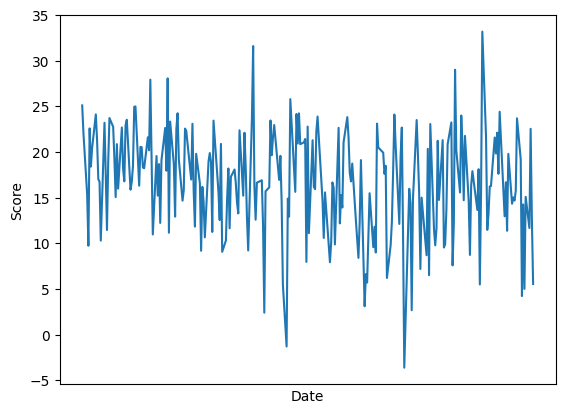

In [43]:
f1 = plt.gcf()
x = tweet_tesla['Date']
y = tweet_tesla['sentimental score']
plt.xlabel('Date')
plt.ylabel('Score')
plt.xticks(np.arange(0,75,step = 5))
plt.plot(x,y.values,label='Sentimental Score overtime')

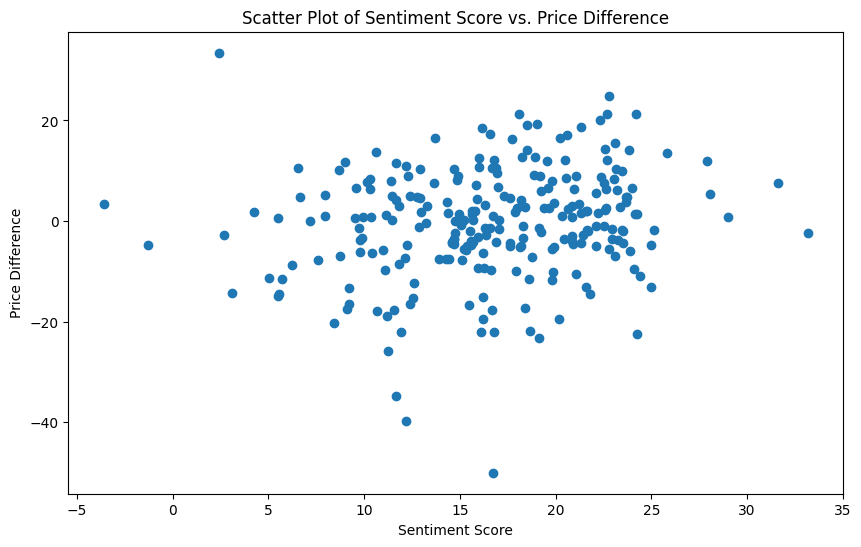

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(tweet_tesla['sentimental score'].values, tweet_tesla['Price Difference'].values)
plt.xlabel('Sentiment Score')
plt.ylabel('Price Difference')
plt.title('Scatter Plot of Sentiment Score vs. Price Difference')
plt.show()

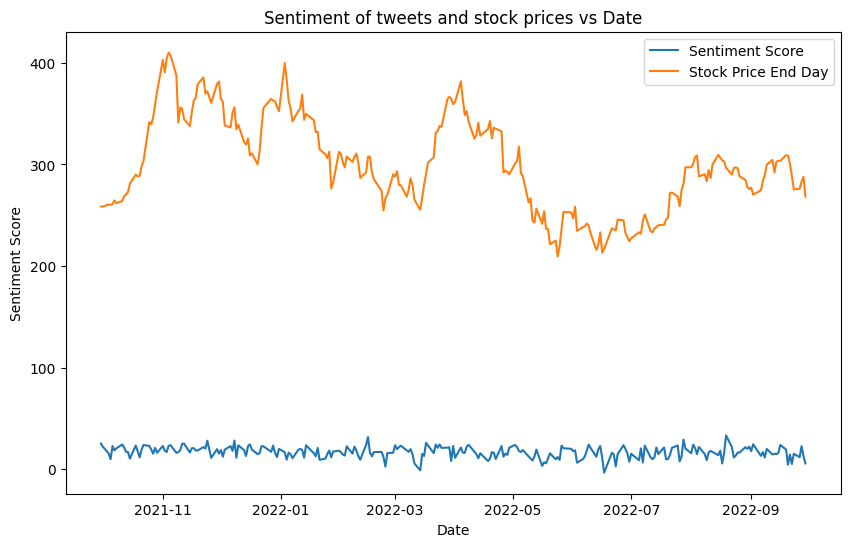

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(tweet_tesla['Date'], tweet_tesla['sentimental score'], label='Sentiment Score')
plt.plot(tweet_tesla['Date'], tweet_tesla['End Day Price'], label='Stock Price End Day')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment of tweets and stock prices vs Date')
plt.legend()
plt.show()

# Ethics & Privacy

In our project, there exist several ethical and privacy concerns. First of all, to collect users' twitter posts might be a violation of privacy. Although Twitter posts are publicly posted, people might not want to have their posts be a part of a project or an experiment. Thus, we planned to handle this privacy issue by anonymizing all data from the users. In addition, there exists a potential bias that it is hard to judge a human written post as simply positive or negative. Some posts might contain emotions that are complex. People might be confused about the trend of a stock's price, or hard to determine whether they are clearly for or clearly against a change in the stock prices. Also, we should be able to accurately interpret the information contained in a twitter post. To handle this issue, we must present our findings as transparently as possible. Also, since our data set is relatively large(there are thousands of twitter posts), we could clearly identify the ones who are less complex or have clear stances, and analyze the correlation between those posts and the stock prices.

One of the concerns is that our data relies heavily on the judgements of a sentiment analysis model. It's important to use these models with caution, be aware of their potential shortcomings, and complement them with human judgment and context whenever possible to ensure the most accurate and reliable analysis of sentiment in your data. Also, the words defined for negative in a stock context might be different with general sentiment analysis. We can try out several analysis models and compare the results between different models, finding the most accurate model. 

# Team Expectations 

- **Timely Project Work**:

    Punctuality: Complete tasks promptly, meet deadlines, and maintain a consistent effort for synchronized project progress.

    Equitable Contribution: Ensure a fair distribution of responsibilities by contributing proportionately to the project workload.

    Proactivity: Embrace a proactive work ethic by actively engaging with project requirements.

- **Open and Consistent Communication**:

    Transparency: Share information openly about task progress, challenges, and potential workloads.

    Conflict Resolution: Address conflicts promptly, seeking resolutions or proposing solutions for effective problem-solving.

    Regular Updates: Provide consistent updates on task status, checkpoints, and any changes to the project plan.

<!-- - Keeping up with the project work in a timely manner with everyone providing similar effort to the project
- Having open and consistent communication to update everyone on any conflicts and issues in order to proceed with the project smoothly.  -->

# Project Timeline Proposal

Two aspects that we may need guidance on are: obtaining data from social media sites where APIs may not be available; and using sentiment analysis models to determine whether text is positve or negative towards certain entities.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/5  |  1 PM | Proposal  | Collect Datasets, Assign EDA Tasks | 
| 11/12  |  1 PM |  Collection of Raw Data; Data cleaning | Completing Checkpoint 1 | 
| 11/20  | 1 PM | Seeking more datas; Starting setiment analysis | Look for datasets of other potential stocks/tweets; Start EDA for existing data |
| 11/25  | 1 PM | Finishing up EDA, starting analysis | Completing Checkpoint 2 |
| 12/3  | 1 PM  | Draft the report, discussion results | Start Final Project Report |
| 12/11 | 1 PM  | Finalize Project |Prepare for the final presentation |